In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("prices_round_1_day_-2.csv", delimiter=";")
trades_df = pd.read_csv("trades_round_1_day_-1.csv", delimiter=";")

In [5]:
# Filter for SQUID_INK
squid_ink_data = data[data['product'] == 'SQUID_INK']

# Check where ask_volume_2 > 15
squid_ink_data['buy_signal'] = squid_ink_data['ask_volume_2'] > 15

# Buy at ask_price_1 when buy_signal is True
squid_ink_data['buy_price'] = squid_ink_data['ask_price_1'].where(squid_ink_data['buy_signal'], None)

# Check the first few rows of the result
print(squid_ink_data[['timestamp', 'ask_volume_2', 'ask_price_1', 'buy_signal', 'buy_price']].head())


    timestamp  ask_volume_2  ask_price_1  buy_signal  buy_price
2           0           NaN         2002       False        NaN
3         100           NaN         2001       False        NaN
7         200          30.0         2000        True     2000.0
11        300           NaN         2000       False        NaN
14        400           NaN         2000       False        NaN


C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\3811462136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['buy_signal'] = squid_ink_data['ask_volume_2'] > 15
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\3811462136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['buy_price'] = squid_ink_data['ask_price_1'].where(squid_ink_data['buy_signal'], None)


In [6]:
# Check where bid_volume_2 > 15
squid_ink_data['sell_signal'] = squid_ink_data['bid_volume_2'] > 15

# Sell at bid_price_1 when sell_signal is True
squid_ink_data['sell_price'] = squid_ink_data['bid_price_1'].where(squid_ink_data['sell_signal'], None)

# Check the first few rows of the result
print(squid_ink_data[['timestamp', 'bid_volume_2', 'bid_price_1', 'sell_signal', 'sell_price']].head())


    timestamp  bid_volume_2  bid_price_1  sell_signal  sell_price
2           0           NaN         1998        False         NaN
3         100          26.0         1999         True      1999.0
7         200           NaN         1997        False         NaN
11        300           NaN         1997        False         NaN
14        400           NaN         1996        False         NaN


C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1626359769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['sell_signal'] = squid_ink_data['bid_volume_2'] > 15
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1626359769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['sell_price'] = squid_ink_data['bid_price_1'].where(squid_ink_data['sell_signal'], None)


In [9]:
# Create a column that shows if the price changes significantly
threshold = 0.05  # A 5% price movement
squid_ink_data['price_change'] = squid_ink_data['mid_price'].pct_change()

# Identify where price change is larger than the threshold (both positive and negative)
squid_ink_data['significant_move'] = squid_ink_data['price_change'].abs() > threshold

# Also check if the price change was accompanied by large bid/ask volumes
squid_ink_data['impact_signal'] = squid_ink_data['significant_move'] & (squid_ink_data['bid_volume_2'] > 15)

# Check for significant price changes with order impact
print(squid_ink_data[['timestamp', 'bid_volume_2', 'ask_volume_2', 'mid_price', 'price_change', 'significant_move', 'impact_signal']].head())


    timestamp  bid_volume_2  ask_volume_2  mid_price  price_change  \
2           0           NaN           NaN     2000.0           NaN   
3         100          26.0           NaN     2000.0       0.00000   
7         200           NaN          30.0     1998.5      -0.00075   
11        300           NaN           NaN     1998.5       0.00000   
14        400           NaN           NaN     1998.0      -0.00025   

    significant_move  impact_signal  
2              False          False  
3              False          False  
7              False          False  
11             False          False  
14             False          False  


C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\2001601742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['price_change'] = squid_ink_data['mid_price'].pct_change()
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\2001601742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['significant_move'] = squid_ink_data['price_change'].abs() > threshold
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\2001601742.py:9: SettingWithCopyWarning: 
A value is trying to be set on 

In [12]:
# Calculate rolling mean of the mid price
window_size = 50  # Use a rolling window of 50 timestamps
squid_ink_data['rolling_mean'] = squid_ink_data['mid_price'].rolling(window=window_size).mean()

# Calculate the deviation from the rolling mean
squid_ink_data['deviation'] = squid_ink_data['mid_price'] - squid_ink_data['rolling_mean']

# Identify if the deviation is more than a threshold (e.g., 2 standard deviations)
std_dev = squid_ink_data['deviation'].std()
threshold_deviation = 2 * std_dev

squid_ink_data['mean_reversion_signal'] = squid_ink_data['deviation'].abs() > threshold_deviation

# Print rows with significant deviations
print(squid_ink_data[['timestamp', 'mid_price', 'rolling_mean', 'deviation', 'mean_reversion_signal']].head(100))

     timestamp  mid_price  rolling_mean  deviation  mean_reversion_signal
2            0     2000.0           NaN        NaN                  False
3          100     2000.0           NaN        NaN                  False
7          200     1998.5           NaN        NaN                  False
11         300     1998.5           NaN        NaN                  False
14         400     1998.0           NaN        NaN                  False
..         ...        ...           ...        ...                    ...
285       9500     2002.5       2001.49       1.01                  False
289       9600     2003.0       2001.55       1.45                  False
293       9700     2002.5       2001.65       0.85                  False
296       9800     2003.5       2001.73       1.77                  False
297       9900     2003.0       2001.82       1.18                  False

[100 rows x 5 columns]


C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\3712264596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['rolling_mean'] = squid_ink_data['mid_price'].rolling(window=window_size).mean()
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\3712264596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['deviation'] = squid_ink_data['mid_price'] - squid_ink_data['rolling_mean']
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\3712264596.py:12: SettingWithCopyWarning: 
A v

In [13]:
# Calculate rolling correlation between bid and ask prices
squid_ink_data['price_change'] = squid_ink_data['mid_price'].pct_change()
window_size = 20  # Use a 20-step window
squid_ink_data['rolling_corr'] = squid_ink_data['price_change'].rolling(window=window_size).corr(squid_ink_data['price_change'])

# Identify periods where momentum is strong (e.g., correlation > 0.8)
momentum_threshold = 0.8
squid_ink_data['momentum_signal'] = squid_ink_data['rolling_corr'] > momentum_threshold

# Print periods of high momentum
print(squid_ink_data[['timestamp', 'price_change', 'rolling_corr', 'momentum_signal']].head())


    timestamp  price_change  rolling_corr  momentum_signal
2           0           NaN           NaN            False
3         100       0.00000           NaN            False
7         200      -0.00075           NaN            False
11        300       0.00000           NaN            False
14        400      -0.00025           NaN            False


C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1000727404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['price_change'] = squid_ink_data['mid_price'].pct_change()
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1000727404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['rolling_corr'] = squid_ink_data['price_change'].rolling(window=window_size).corr(squid_ink_data['price_change'])
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1000727404.py:8: SettingWithCo

In [15]:
# Calculate the bid-ask spread
squid_ink_data['bid_ask_spread'] = squid_ink_data['ask_price_1'] - squid_ink_data['bid_price_1']

# Check where the spread is above a certain threshold
spread_threshold = 3  # Adjust this based on your data scale
squid_ink_data['large_spread_signal'] = squid_ink_data['bid_ask_spread'] > spread_threshold

# Check if there is a large spread and whether it correlates with price movement
print(squid_ink_data[['timestamp', 'bid_ask_spread', 'mid_price', 'large_spread_signal']].head())


    timestamp  bid_ask_spread  mid_price  large_spread_signal
2           0               4     2000.0                 True
3         100               2     2000.0                False
7         200               3     1998.5                False
11        300               3     1998.5                False
14        400               4     1998.0                 True


C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\3567030646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['bid_ask_spread'] = squid_ink_data['ask_price_1'] - squid_ink_data['bid_price_1']
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\3567030646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['large_spread_signal'] = squid_ink_data['bid_ask_spread'] > spread_threshold


In [23]:
# Function for Liquidity Imbalance Detection (Volume Pattern)
def liquidity_imbalance(data, volume_threshold=15):
    # Detects when ask_volume_2 > threshold, and bid_volume_2 < threshold
    buy_signal = data['ask_volume_2'] > volume_threshold
    sell_signal = data['bid_volume_2'] > volume_threshold
    
    return buy_signal, sell_signal

# Function for Price Impact Detection (Significant Price Movement)
def price_impact(data, threshold=0.05):
    data['price_change'] = data['mid_price'].pct_change()
    significant_move = data['price_change'].abs() > threshold
    return significant_move

# Function for Mean Reversion (Price Reversion)
def mean_reversion(data, window_size=50, threshold_factor=2):
    # Calculate rolling mean and deviation
    data['rolling_mean'] = data['mid_price'].rolling(window=window_size).mean()
    data['deviation'] = data['mid_price'] - data['rolling_mean']
    std_dev = data['deviation'].std()
    threshold_deviation = threshold_factor * std_dev
    
    mean_reversion_signal = data['deviation'].abs() > threshold_deviation
    return mean_reversion_signal

# Function for Momentum Detection (Price Momentum)
def momentum_detection(data, window_size=20, momentum_threshold=.5):
    data['price_change'] = data['mid_price'].pct_change()
    data['rolling_corr'] = data['price_change'].rolling(window=window_size).corr(data['price_change'].shift(1))
    
    momentum_signal = data['rolling_corr'] > momentum_threshold
    return momentum_signal

# Function for Bid-Ask Discrepancy (Market Depth)
def bid_ask_discrepancy(data, spread_threshold=0.5):
    data['bid_ask_spread'] = data['ask_price_1'] - data['bid_price_1']
    large_spread_signal = data['bid_ask_spread'] > spread_threshold
    return large_spread_signal


In [24]:
def run_patterns_automatically(data):
    # Run the pattern detection functions
    buy_signal, sell_signal = liquidity_imbalance(data)
    price_move_signal = price_impact(data)
    mean_reversion_signal = mean_reversion(data)
    momentum_signal = momentum_detection(data)
    bid_ask_signal = bid_ask_discrepancy(data)
    
    # Combine results into a DataFrame to track results
    results = pd.DataFrame({
        'timestamp': data['timestamp'],
        'buy_signal': buy_signal,
        'sell_signal': sell_signal,
        'price_move_signal': price_move_signal,
        'mean_reversion_signal': mean_reversion_signal,
        'momentum_signal': momentum_signal,
        'bid_ask_signal': bid_ask_signal
    })
    
    # Calculate likelihoods for each pattern
    likelihoods = {
        'buy_signal_likelihood': buy_signal.mean(),
        'sell_signal_likelihood': sell_signal.mean(),
        'price_move_likelihood': price_move_signal.mean(),
        'mean_reversion_likelihood': mean_reversion_signal.mean(),
        'momentum_likelihood': momentum_signal.mean(),
        'bid_ask_likelihood': bid_ask_signal.mean()
    }
    
    return results, likelihoods


In [25]:
run_patterns_automatically(squid_ink_data)

C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1598260257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_change'] = data['mid_price'].pct_change()
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1598260257.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'] = data['mid_price'].rolling(window=window_size).mean()
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1598260257.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

(       timestamp  buy_signal  sell_signal  price_move_signal  \
 2              0       False        False              False   
 3            100       False         True              False   
 7            200        True        False              False   
 11           300       False        False              False   
 14           400       False        False              False   
 ...          ...         ...          ...                ...   
 29986     999500       False        False              False   
 29990     999600       False        False              False   
 29992     999700       False        False              False   
 29994     999800        True        False              False   
 29999     999900       False         True              False   
 
        mean_reversion_signal  momentum_signal  bid_ask_signal  
 2                      False            False            True  
 3                      False            False            True  
 7                     

In [38]:
import numpy as np
import pandas as pd
import scipy.optimize as opt

# Load price series (example with a pandas DataFrame 'price_series')
# Replace with your actual data
price_series = squid_ink_data['mid_price']
# Step 1: Calculate log-returns
log_returns = np.log(price_series[1:].values / price_series[:-1].values)

# Step 2: Define the likelihood function for the OU process
def ou_log_likelihood(params, r):
    mu, theta, sigma = params
    n = len(r)
    ll = -0.5 * n * np.log(2 * np.pi * sigma**2)
    ll -= 0.5 * np.sum((r - mu) ** 2 / sigma**2)
    ll -= 0.5 * np.sum(np.log(1 + (theta**2) / sigma**2))  # term accounting for mean reversion
    return -ll  # return negative log-likelihood for minimization

# Step 3: Estimate parameters using MLE
initial_guess = [2000, 0.1, 20]  # initial guess for mu, theta, sigma
result = opt.minimize(ou_log_likelihood, initial_guess, args=(log_returns,), bounds=[(-np.inf, np.inf), (0, np.inf), (0, np.inf)])

# Step 4: Extract fitted parameters
mu_fitted, theta_fitted, sigma_fitted = result.x
print(f"Fitted parameters: mu = {mu_fitted}, theta = {theta_fitted}, sigma = {sigma_fitted}")

# You can now use these parameters to simulate future price movements or perform predictions.


Fitted parameters: mu = -386.5569197598138, theta = 0.1, sigma = 616.0061153299278


C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1322267571.py:15: RuntimeWarning: divide by zero encountered in log
  ll = -0.5 * n * np.log(2 * np.pi * sigma**2)
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1322267571.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ll -= 0.5 * np.sum((r - mu) ** 2 / sigma**2)
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1322267571.py:16: RuntimeWarning: invalid value encountered in double_scalars
  ll -= 0.5 * np.sum((r - mu) ** 2 / sigma**2)
C:\Users\tzs7ch\AppData\Local\Temp\ipykernel_23912\1322267571.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  ll -= 0.5 * np.sum(np.log(1 + (theta**2) / sigma**2))  # term accounting for mean reversion


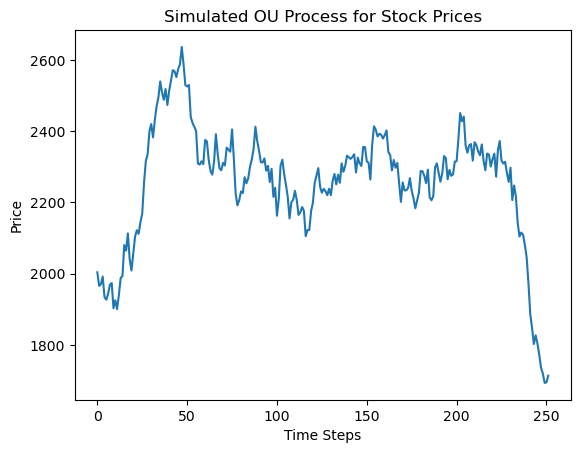

In [41]:
# Simulate future price path using fitted OU process parameters
def simulate_ou(mu, theta, sigma, X0, T, dt=1/252, steps=252):
    X = np.zeros(steps)
    X[0] = X0
    for t in range(1, steps):
        epsilon = np.random.normal(0, 1)
        X[t] = X[t-1] + theta * (mu - X[t-1]) * dt + sigma * np.sqrt(dt) * epsilon
    return X

# Example: Simulate future prices
simulated_prices = simulate_ou(mu_fitted, theta_fitted, sigma_fitted, price_series.iloc[-1], T=1)

# Plot the simulated future prices
plt.plot(simulated_prices)
plt.title("Simulated OU Process for Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.show()


In [42]:
def predict_ou(mu, theta, sigma, X0, T, dt=1/252, steps=252):
    X = np.zeros(steps)
    X[0] = X0
    for t in range(1, steps):
        # Compute expected price using OU process mean reversion
        X[t] = X[t-1] + theta * (mu - X[t-1]) * dt
    return X

# Predict future prices for multiple time steps
predicted_prices = predict_ou(mu_fitted, theta_fitted, sigma_fitted, X0, T)

NameError: name 'X0' is not defined